<a href="https://colab.research.google.com/github/alicerueda/TFSqueezed-CRNN/blob/master/TFRepresentationChangeEmphasis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a join project between Michael Nigro and Alice Rueda under the supervision of Prof. Sridhar Krishnan. The purpose of this file is to see the TF representation and to determine what is the easiest way of differenting them by visual inspection.

Created by Alice on Sept 20, 2019

Modification: Sept 23, 2019


1.   correct psd cube format to be passed to the plot_image(). Filename: "TFRepresentation.ipynb"
2.   changed the normalization with a fixed value for all. Any greyscale value larger than 3.1813424 will have a full pixel value.

Modification: Sept 30, 2019. Filename: "TFRepresentationChangeEmphasis.ipynb"
1. Improve the emphasis by using soft thresholding on the amplitude. Using 2 linear scaler, a larger scaling for smaller magnitude and a smaller scaling for larger magnitude.

Last modification: Oct 9, 2019
1. Creating Mel Filterbanks for mel spectrogram





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Listing wave files from the audio directory


In [3]:
!pip install soundfile

In [0]:
import os
import glob
import numpy as np
import random
import soundfile as sf  #reading 24 bit sound file
import librosa          # stft function
import matplotlib.pyplot as plt
#from scipy.signal import get_window 



In [5]:
os.chdir('/content/drive/My Drive/DCASE19 ASC/')
os.listdir()

['TAU-urban-acoustic-scenes-2019-development',
 'Figures',
 'GetDCASEfiles.ipynb',
 '__pycache__',
 'DCASE Paper.gdoc',
 'checkpoints',
 'Project Timeline',
 'crnn.ipynb',
 'BadResults',
 'tfutil.py',
 'tfutilOLD.py',
 'TFSqueezedDoubleEmp',
 'TFSqueezedOLD',
 'TFSqueezedSingleEmp',
 'MainPSDTFSqueeze.ipynb',
 'Copy of MainPSDTFSqueeze.ipynb',
 'TFRepresentation.ipynb',
 'TFRepresentationChangeEmphasis.ipynb',
 'TrainingResults',
 'crnn_training.ipynb']

In [0]:
# Reading all the available filename for each recording type and display the number of recordings
# IMPORTANT: You might need to execute this section again, if the next part does not work correctly.

audiopath = './TAU-urban-acoustic-scenes-2019-development/audio/'

txt = audiopath + 'airport*.wav'
airportaddrs = glob.glob(txt)
txt = audiopath + 'shopping_mall*.wav'
shopping_malladdrs = glob.glob(txt)
txt = audiopath + 'metro_station*.wav'
metro_stationaddrs = glob.glob(txt)
txt = audiopath + 'street_pedestrian*.wav'
street_pedestrianaddrs = glob.glob(txt)
txt = audiopath + 'public_square*.wav'
public_squareaddrs = glob.glob(txt)
txt = audiopath + 'street_traffic*.wav'
street_trafficaddrs = glob.glob(txt)
txt = audiopath + 'tram*.wav'
tramaddrs = glob.glob(txt)
txt = audiopath + 'bus*.wav'
busaddrs = glob.glob(txt)
txt = audiopath + 'metro-*.wav'
metroaddrs = glob.glob(txt)
txt = audiopath + 'park*.wav'
parkaddrs = glob.glob(txt)



In [9]:
# Define arrays for record_type, number_of_records and their filename_addresses
# IMPORTANT: If you see this first address size is 0. You will need to execute the last part again.
#            For some reason, colab does not pick up the ariportaddrs correctly.

recordkind = ['airport','shopping_mall','metro_station','street_pedestrian',
             'public_square', 'street_traffic', 'tram', 'bus', 'metro', 'park']


numrecords = [len(airportaddrs), len(shopping_malladdrs),
              len(metro_stationaddrs), len(street_pedestrianaddrs),
              len(public_squareaddrs), len(street_trafficaddrs),
              len(tramaddrs), len(busaddrs), len(metroaddrs),
              len(parkaddrs)]

print(numrecords)



addrs = [airportaddrs, shopping_malladdrs, metro_stationaddrs,
         street_pedestrianaddrs, public_squareaddrs, street_trafficaddrs,
         tramaddrs, busaddrs, metroaddrs, parkaddrs]
addrs = np.asarray(addrs)

print(np.size(addrs[8]))
print(addrs[8][0])
print(type(addrs[8]))
addrs.shape



[1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440, 1440]
1440
./TAU-urban-acoustic-scenes-2019-development/audio/metro-barcelona-220-6645-a.wav
<class 'numpy.ndarray'>


(10, 1440)

# Testing spectrogram on 10 samples from each type of sound

In [10]:
# Randomly sample 10 recordings for each type
samples   = 10
types     = 10
sampleaddrs = ["" for x in range(types)]
sampleaddrs = [sampleaddrs for x in range(samples)]

# Random sampling 10 recording from each type
# (Sept 23, 2019) COLAB made changes today. random.sample() was working in the morning. But, now I have change it to list. 
for i in range(10):
  tmpaddrs = list(addrs[i])
  sampleaddrs[i]=random.sample(tmpaddrs, 10)

print(np.size(sampleaddrs))
sampleaddrs = np.array(sampleaddrs)
print(sampleaddrs[0:10,3])

100
['./TAU-urban-acoustic-scenes-2019-development/audio/airport-lyon-1169-45588-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/shopping_mall-barcelona-254-7621-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/metro_station-paris-77-2125-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/street_pedestrian-milan-1096-40704-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/public_square-barcelona-109-3134-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/street_traffic-stockholm-273-8324-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/tram-london-277-8446-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/bus-london-25-879-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/metro-lyon-1064-41772-a.wav'
 './TAU-urban-acoustic-scenes-2019-development/audio/park-stockholm-102-2896-a.wav']


In [0]:
# Reading 1 file to check the fs and file size
audio, fs = sf.read(sampleaddrs[1,1])
sound = audio[:,0]


In [15]:
# Define STFT parameters
framesize = 0.02 #Setting frame size to 2 msec
n_fft=max(np.floor(framesize*fs),1024)
overlap = 2
hop_length = int(n_fft/overlap)
win_length = n_fft
center = True
stft_config = dict(n_fft=n_fft, 
                   hop_length=hop_length, 
                   win_length=n_fft, 
                   window='hann')
lenSound = int(np.floor(len(sound)/fs)*fs)
fDim = int(np.floor(n_fft/2) + 1)
tDim = int(lenSound/(fDim-1))+ 1

[tDim, fDim, lenSound]

[938, 513, 480000]

In [16]:
addrs.shape

(10, 1440)

In [0]:
# Taking 10 samples to study the effect of DC powers. Then, zero out the psd at f=0Hz to see the differences
numrecordings = 10

# Create and put PSD & filename in array
psd = [[] for x in range(numrecordings)]
psd = [psd for x in range(10)]

maxpsd = np.zeros((10,numrecordings))
maxidx = np.zeros((10,numrecordings,2))


channel = 1
globalmaxpsd = 0


for i in range(10):
  for j in range(numrecordings):
    
    #addr[i][j] = sampleaddrs[i][j]
    audio, fs = sf.read(sampleaddrs[i,j])
    sound = audio[:,channel]

    sound = sound[0:lenSound]
    STFT = librosa.stft(sound, **stft_config)  
    mag = np.asarray(np.abs(STFT))
    tmp = np.multiply(mag,mag)
    #tmp[0] = 0 # comment this line out to see the effects of DC value
    maxpsd[i][j] = np.max(tmp)
    maxidx[i][j] = np.where(tmp==maxpsd[i][j])
    if maxpsd[i][j]>globalmaxpsd:
      globalmaxpsd = maxpsd[i][j]
    #tmp = np.asarray(tmp/maxpsd[i]*255)
    psd[i][j] = tmp
    
    '''
    t=np.arange(0, len(sound)/fs, 512/fs)
    f=np.arange(0, fs/2, fs/(2*513))
    plt.pcolormesh(t, f, np.transpose(psd))
    plt.title('STFT Magnitude Square')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()
    '''

psd = np.array(psd)


(10, 10, 513, 938)
6113.8603515625


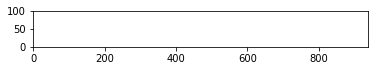

In [14]:
print(psd.shape)
recordtype = 6
recordnumber = 5
nrows = 100
print(maxpsd[recordtype][recordnumber])
plt.imshow(psd[recordtype][recordnumber][0:nrows],cmap='gray_r', vmin=0, vmax=255, origin='lower')   


In [15]:
print('Maximum psd values: \n',maxpsd)
print('location of the maximum psd [Freq][Time]: \n', np.transpose(maxidx))
print('Most of the maximum values are at f=0 Hz. All psd at f=0 Hz have been forced to 0. \n')
print('Global maximum PSD for all 100 samples is ', globalmaxpsd)


Maximum psd values: 
 [[8.10073793e-01 1.56132209e+00 2.31645513e+00 1.00132866e+01
  3.13908815e+00 4.07110929e+00 1.69986359e+02 7.84197855e+00
  7.29404354e+00 6.84628487e+00]
 [5.66369915e+00 4.44362307e+00 4.58623648e+00 4.00423717e+00
  2.84532509e+01 6.88518763e+00 2.50598049e+00 5.90493727e+00
  7.64996624e+00 3.49575157e+01]
 [1.49518372e+02 5.19436279e+02 1.89178073e+00 3.67159767e+01
  1.25301046e+01 2.45191422e+01 3.67647171e+01 8.29494690e+02
  1.22160072e+02 7.81315247e+02]
 [4.90539980e+00 7.41858125e-01 1.27157049e+01 5.05509663e+00
  8.78077507e+00 3.20323825e+00 1.27631950e+00 5.06349678e+01
  4.86262550e+01 4.80194473e+00]
 [1.78616318e+02 4.51333618e+00 1.41801538e+01 2.87173347e+01
  2.96710453e+01 1.05292237e+00 1.04280672e+01 3.22785225e+01
  2.80699968e+00 6.19201803e+00]
 [4.16469765e+01 2.76872845e+01 7.86886215e+01 2.36410141e+01
  1.14598743e+03 6.40646820e+01 1.18133080e+02 6.67835007e+01
  1.97182121e+01 4.26633850e+02]
 [5.28599014e+01 8.83287430e+01 3.00

In [16]:
# Trying to figure out the indexing for the psd list object: psd[i][0][fdim][tdim]
print(type(psd))
nrow, ncol = psd[3,1].shape
print(sampleaddrs[1,2])
print('number of row (Freq): ', nrow)
print('number of col (Time): ', ncol)

recordtype = 0
recordnumber = 1
np.size(psd[recordtype,recordnumber][512][1:10])


<class 'numpy.ndarray'>
./TAU-urban-acoustic-scenes-2019-development/audio/shopping_mall-barcelona-254-7640-a.wav
number of row (Freq):  513
number of col (Time):  938


9

(513, 938)
4.961657524108887


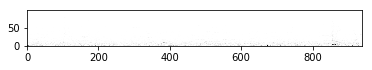

In [0]:
# This part is to visualize each psd matrix created above. Change recordtype to another integer in (0:9)
recordtype = 3
recordnumber = 1

test = np.array(psd[recordtype,recordnumber])
print(test.shape)
print(maxpsd[recordtype][recordnumber])

plt.imshow(psd[recordtype][recordnumber][0:99],cmap='gray_r', vmin=0, vmax=maxpsd[recordtype][recordnumber], origin='lower')
#plt.imshow(psd[recordtype][100:512],cmap='gray_r', vmin=0, vmax=maxpsd[i], origin='lower')

In [0]:
# Helper function to plot the Power Spectral Density
def plot_images(psd, addr, plotrows, figSizeHeight=10):
  
  #nrow, ncol = psd[0].shape
  #plotrows = int(np.floor(nrow/2))

  figSizeWidth = 20
  #figSizeHeight = 20

  # Create figure with sub-plots.
  fig, axes = plt.subplots(5, 2)
  fig.set_size_inches(figSizeWidth, figSizeHeight)

  # Adjust spacing between subplots.
  hspace = 1
  fig.subplots_adjust(hspace=hspace, wspace=0.3)


  for i, ax in enumerate(axes.flat):
      # There may be less than 10 images, ensure it doesn't crash.
      if i < len(addr):
          # Plot image.
          image = psd[i]
          #maxpsd = np.max(image[0][0:nrow])   # The display is set to range [0:maxpsd], where maxpsd=3.1813424. Anything larger than that will have full pixel value of 255
          ax.imshow(image[0:plotrows],
                    cmap='gray_r', 
                    vmin=0, 
                    vmax=255, 
                    origin='lower')

          # Show true and predicted classes.
          xlabel = os.path.basename(addr[i])

          # Show the classes as the label on the x-axis.
          ax.set_xlabel(xlabel)

      # Remove ticks from the plot.
      ax.set_xticks([])
      ax.set_yticks([])

  # Ensure the plot is shown correctly with multiple plots
  # in a single Notebook cell.
  plt.show()


  np.size(image)



(513, 938)


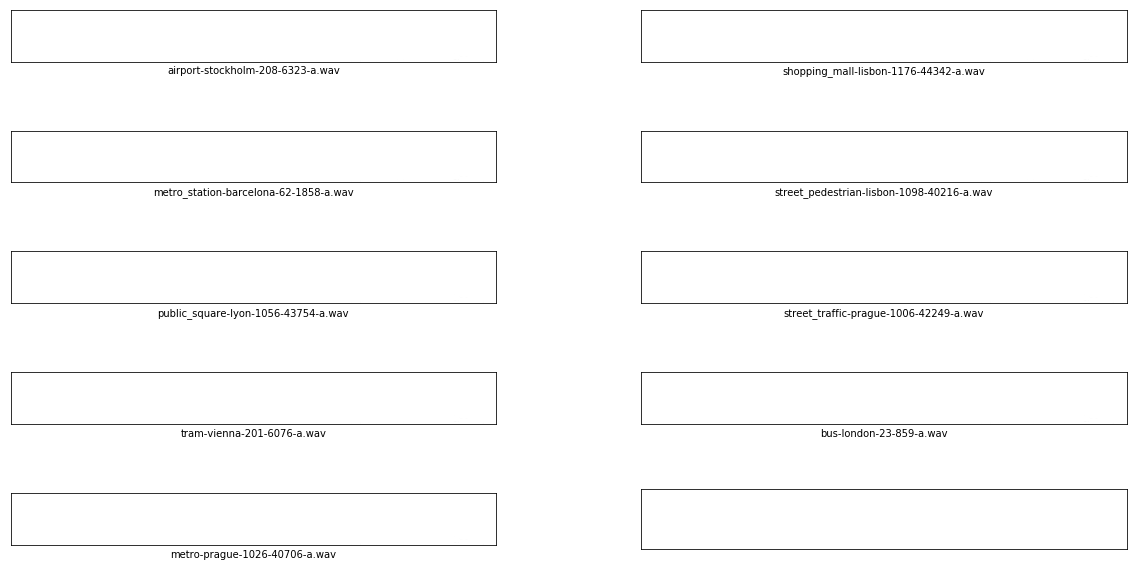

In [0]:
recordnumber = 1
tmppsd = psd[0:10,recordnumber]
print(tmppsd[0].shape)
plot_images(tmppsd,sampleaddrs[0:9,recordnumber], plotrows=100)

# Formal coding begin

Basicline: Estimate PSD using hann window of 20 msec framesize. DCASE sampling frequency is 48 kHz. With 20 msec round up to the next binary power of 2^10 frame size. Each frequency bin is 46.875 Hz.

## Signal Processing 
Emphasis using Magnitude Scaling, Compression using Time and Frequency Squeezing (Grouping)

In [0]:
# Define STFT parameters
framesize = 0.02 #Setting frame size to 2 msec
n_fft=max(np.floor(framesize*fs),1024)
overlap = 2
hop_length = int(n_fft/overlap)
win_length = n_fft
center = True
stft_config = dict(n_fft=n_fft, 
                   hop_length=hop_length, 
                   win_length=n_fft, 
                   window='hann')
lenSound = int(np.floor(len(sound)/fs)*fs)
fDim = int(np.floor(n_fft/2) + 1)
tDim = int(lenSound/(fDim-1))+ 1


# Estimate PSD using STFT
def createPSD(sound):
  STFT = librosa.stft(sound, **stft_config)  
  
  mag = np.asarray(np.abs(STFT))
  tmp = np.multiply(mag,mag)
  maxpsd = np.max(tmp)
  psd = np.asarray(tmp/maxpsd*255)
  
  return maxpsd, psd



37.755928
<class 'numpy.ndarray'>
481194


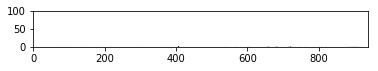

In [0]:
#Testing the create_PSD()
maxpsd1, psd1 = createPSD(sound)

print(maxpsd1)
print(type(psd1))
print(np.size(psd1))
plt.imshow(psd1[0:100],cmap='gray_r', vmin=0, origin='lower')

Method 1: Changing the PSD by thresholding the value to 25

*2-tier Magnitude Scaling*
1. Magnitude<threshold1: scaled to 0-127
2. threshold1<Magnitude<threshold2: scaled to 128-255 
3. Mangitude>threshold2: 255

In [0]:
# Truncating all values above the threshold and normalize it over the [0:threshold]
def truncatePSD(psdMatrix):
  threshold1 = 1
  lowPixelValue = 223

  threshold2 = 5
  highPixelValue = 255   #int8 

  
  psdMatrix = np.asarray(psdMatrix)
  nrow,ncol = psdMatrix.shape
  truncNormPSD = np.zeros((nrow, ncol))
  # Checking if the value is below thresold1 and perform scaling
  # Masking is used to identify the elements that satisfies the criteria
  mask1 = np.zeros((nrow, ncol))
  mask1[psdMatrix<threshold1] = 1
  tmp1 = psdMatrix/threshold1*lowPixelValue
  tmp1 = np.multiply(tmp1,mask1) # Contain the scaled elements that were originally less than threshold1
  truncNormPSD = tmp1

  # Checking if the values are above threshold 2
  mask2 = np.zeros((nrow,ncol))
  truncNormPSD[psdMatrix>threshold2] = 255

  # The rest of the numbers that between 3-100 will be scaled
  mask3 = np.ones((nrow,ncol))
  mask3 = mask3-mask1-mask2 #The rest of the elements that fall between 3-100
  tmp2 = np.zeros((nrow,ncol))
  tmp2 = (psdMatrix-threshold1)/(threshold2-threshold1)*(highPixelValue-lowPixelValue)+lowPixelValue
  tmp2 = np.multiply(tmp2,mask3)

  truncNormPSD=truncNormPSD+tmp2
  #truncNormPSD = truncNormPSD/threshold*maxPixelValue
  
  return truncNormPSD

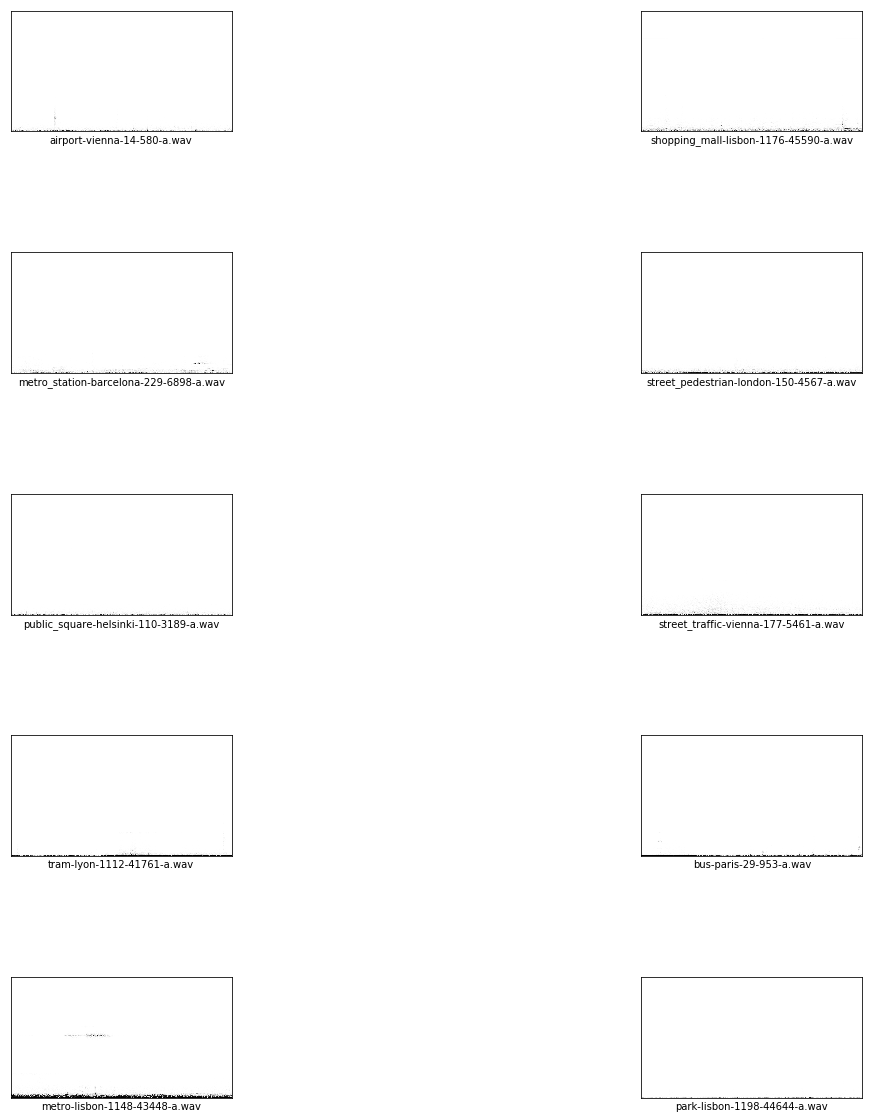

In [0]:
# Testing truncNormPSD function
recordnumber = 0
truncNormPSD = [[] for x in range(10)]
tmpaddr = sampleaddrs[0:10,recordnumber]

plotheight = 20 #for nrow=513

for i in range(10):
  psdtest = psd[recordnumber,i]
  truncNormPSD[i] = truncatePSD(psdtest)

plot_images(truncNormPSD,tmpaddr,513, plotheight)

#plt.imshow(truncNormPSD[0:100],cmap='gray_r', vmin=0, vmax=maxpsd, origin='lower')
#print(addr[recordtype])

In [0]:
# Grouping N time-vectors together into one timeslot
def groupTimePSD(psdMatrix, N):
  nrow, ncol = psdMatrix.shape
  numslots = int(np.floor(ncol/N))
  timeFramedPSD = np.zeros([nrow,numslots])
  for i in range(numslots):
    tmp = psdMatrix[0:nrow,i*N:i*N+N]
    timeFramedPSD[:,i]=np.sum(tmp,axis=1)
  return timeFramedPSD

115.48668670654297


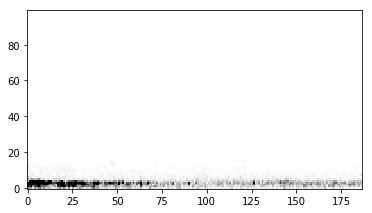

In [0]:
test=groupTimePSD(psd[8][8],N=5)
print(maxpsd[8][8])
plt.imshow(test[0:100],cmap='gray_r', vmin=0, vmax=255, origin='lower')

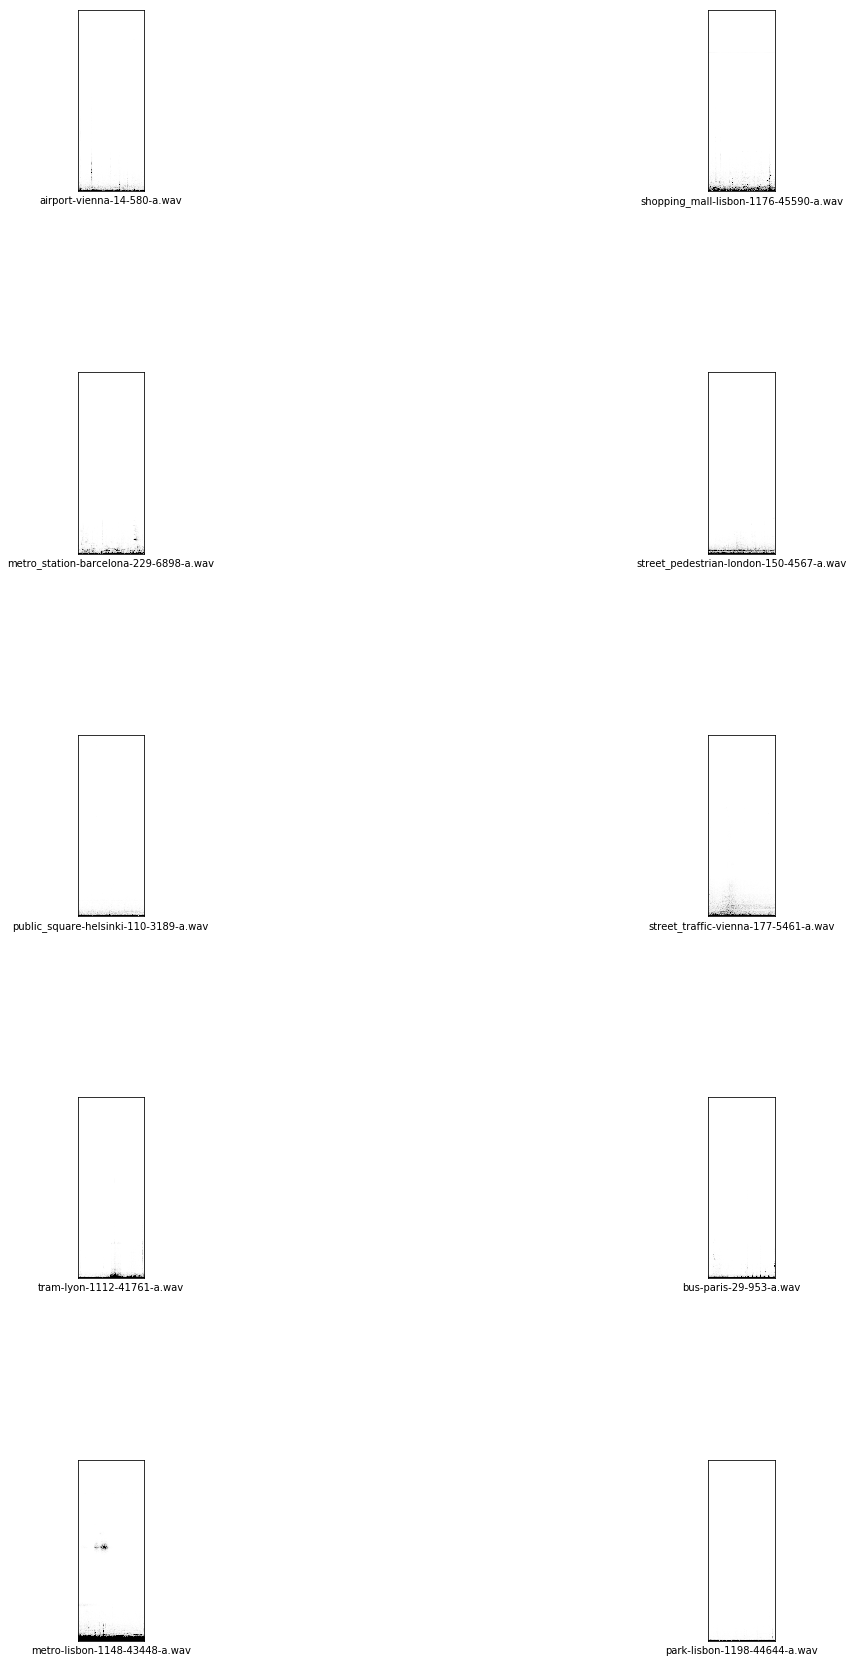

In [0]:
# Testing groupTimePSD function
# This example takes the truncated-normalized psd for grouping
timeFramedPSD = [[] for x in range(10)]

for i in range(10):
  psdtest = truncNormPSD[i]
  timeFramedPSD[i] = groupTimePSD(psdtest, N=5)

plot_images(timeFramedPSD,tmpaddr,300, 30)


In [0]:
# Grouping N Frequency-vectors together into one frequency bin
# NOTE: Equal bin distance does not work well for low frequencies. 
# New changes: only grouping bins above index 50 for every 5 bins 
#              and 2 bins for lower index
def groupFreqPSD(psdMatrix, Nupper):
  lowerbins = 50;
  Nlower = 2
  nrow, ncol = psdMatrix.shape
  numupperbins = int(np.floor((nrow-lowerbins)/Nupper))
  numlowerbins = int(np.floor(lowerbins/2))
  freqFramedPSD = np.zeros([numupperbins+numlowerbins,ncol])
  for i in range(numlowerbins):
    freqFramedPSD[i] = psdMatrix[Nlower*i] +psdMatrix[Nlower*i+1]
  for i in range(numupperbins):
    startbin=i*Nupper+numlowerbins
    stopbin = (i+1)*Nupper+numlowerbins
    tmp = psdMatrix[startbin:stopbin]
    freqFramedPSD[i+numlowerbins,:]=np.sum(tmp,axis=0)
  return freqFramedPSD

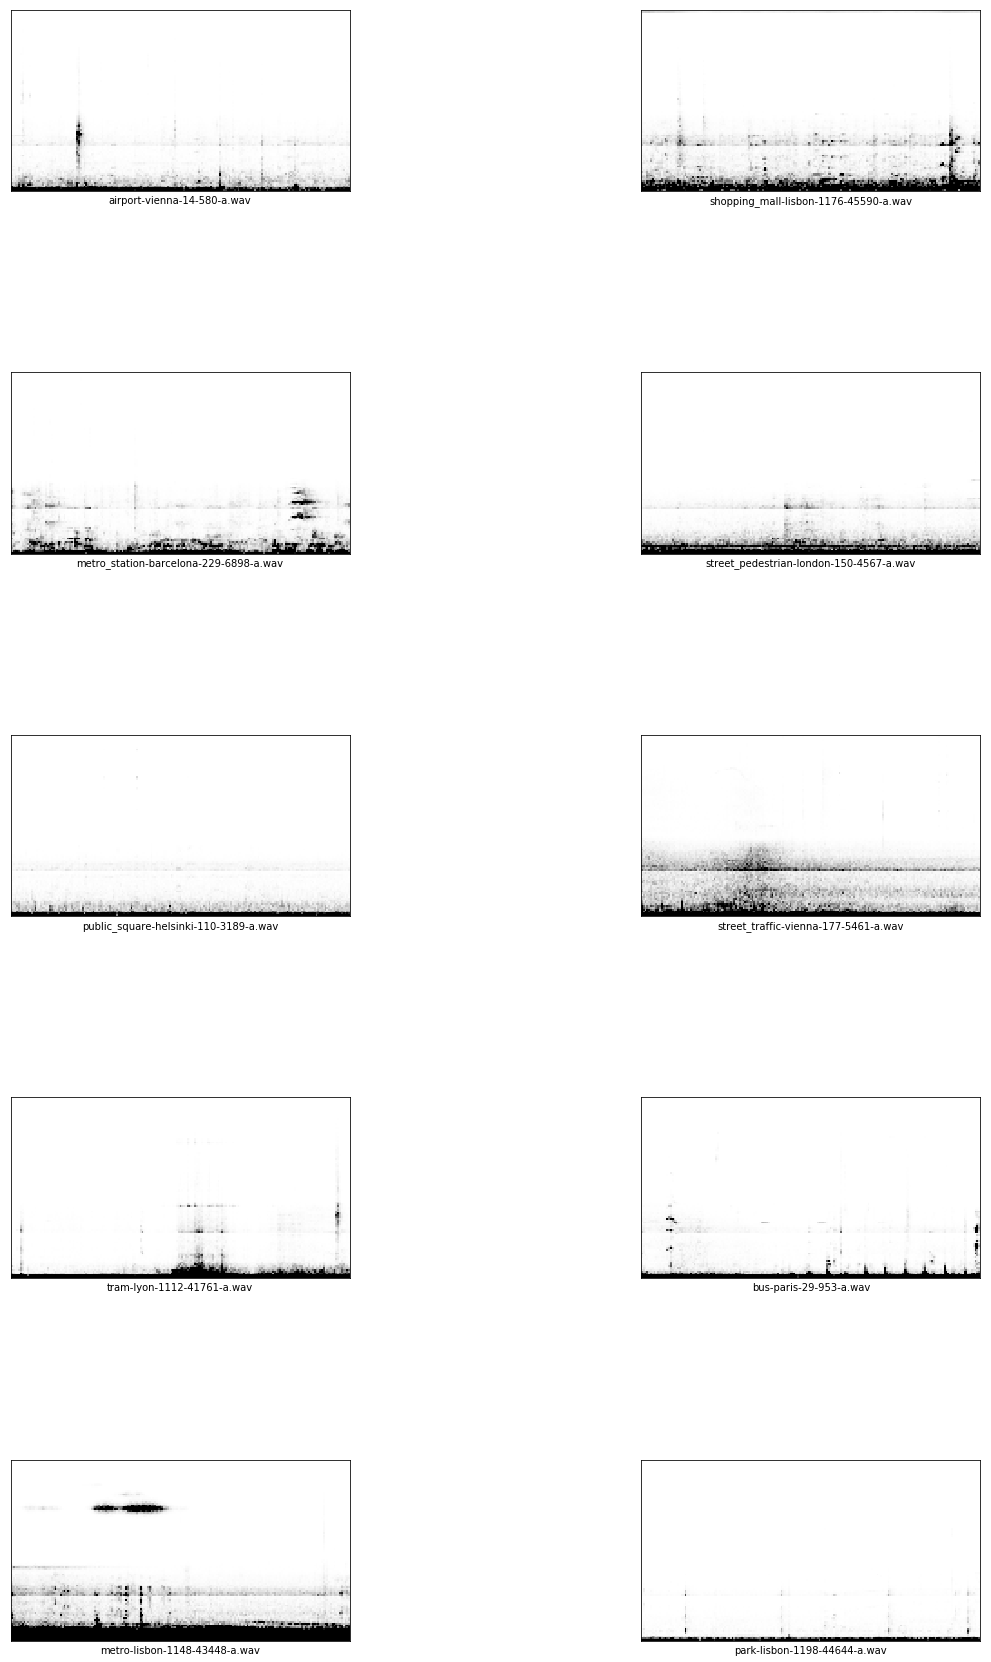

With time and frequency compressing, the original size of  (513, 938)  has been reduced to  (117, 187)


In [0]:
# Testing groupFreqPSD function
# The frequency group with a fixed size removed the lower frequency information. NOT GOOD
freqFramedPSD = [[] for x in range(10)]

for i in range(10):
  psdtest = timeFramedPSD[i]
  freqFramedPSD[i] = groupFreqPSD(psdtest, Nupper=5)

plot_images(freqFramedPSD,tmpaddr, 100, 30)

print('With time and frequency compressing, the original size of ', psd1.shape, ' has been reduced to ', freqFramedPSD[0].shape)

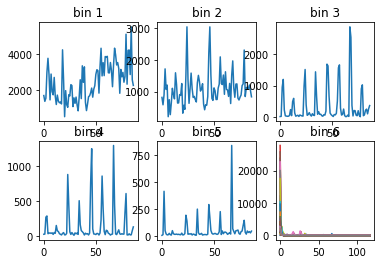

In [0]:
# Checking lower frequency components for tram and bus
tram = 6
bus  = 7
x=freqFramedPSD[bus]
x.shape

fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(x[0,100:200])
axs[0, 0].set_title('bin 1')
axs[0, 1].plot(x[1,100:200])
axs[0, 1].set_title('bin 2')
axs[0, 2].plot(x[2,100:200])
axs[0, 2].set_title('bin 3')
axs[1, 0].plot(x[3,100:200])
axs[1, 0].set_title('bin 4')
axs[1, 1].plot(x[4,100:200])
axs[1, 1].set_title('bin 5')
axs[1, 2].plot(x[5,100:200])
axs[1, 2].set_title('bin 6')

plt.plot(x)


## Using librosa's mel spectrogram

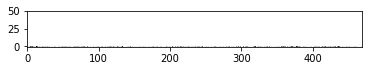

In [52]:
from scipy import signal


n_fft = 2048
hop_length = 1024
fftwindow = signal.get_window('hamming', n_fft)


testmel = librosa.feature.melspectrogram(y=sound, sr=fs/2, n_fft=n_fft, hop_length=hop_length, n_mels=128)#, window='hamming')

plt.imshow(testmel[0:50],cmap='gray_r', vmin=0, origin='lower')



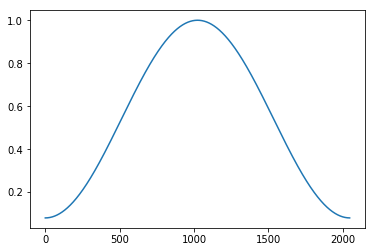

In [46]:
plt.plot(fftwindow)

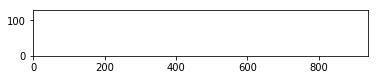

In [22]:
melpsd = librosa.feature.melspectrogram(S=psd[0,0], n_mels = 128)
plt.imshow(10*np.log10(melpsd),cmap='gray_r', vmin=0, vmax=1, origin='lower')

## Mel Filters

In [0]:
fs = 48000

# Creating Mel filters
frange = fs/2   #Frequency range
n_mels = 128     #Number of mel filters


# Define Mel Spec parameters
framesize = 0.04 #Setting frame size to 2 msec
n_fft=max(np.floor(framesize*fs),2048)
overlap = 2
hop_length = int(n_fft/overlap)
win_length = n_fft
center = True
stft_config = dict(n_fft=n_fft, 
                   hop_length=hop_length, 
                   win_length=n_fft, 
                   window='hamming')
lenSound = int(np.floor(len(sound)/fs)*fs)
fDim = int(np.floor(n_fft/2) + 1)
tDim = int(lenSound/(fDim-1))+ 1

# Define the MFCC filter bank
melfb = np.asarray(librosa.filters.mel(frange, n_fft, n_mels))


# Creating Mel Spectrogram
def createMelSpec(sound, melfb):
  STFT = librosa.stft(sound, **stft_config)  
  
  mag = np.asarray(np.abs(STFT))
  tmppsd = np.multiply(mag,mag)
  
  melspec = melfb.dot(tmppsd)
  
  return melspec


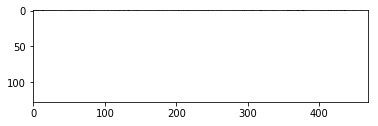

In [67]:
melspec = createMelSpec(sound, melfb)
plt.imshow(melspec, cmap='gray_r')

(128, 1025)


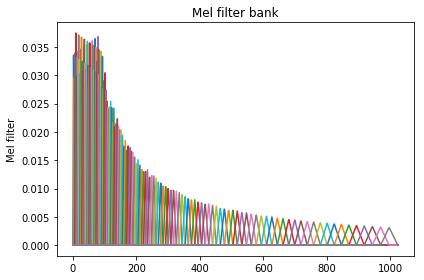

In [69]:
print(melfb.shape)

import matplotlib.pyplot as plt
plt.figure()
for i in range(128):
  plt.plot(melfb[i])
plt.ylabel('Mel filter')
plt.title('Mel filter bank')
plt.tight_layout()
plt.show()

513 938


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


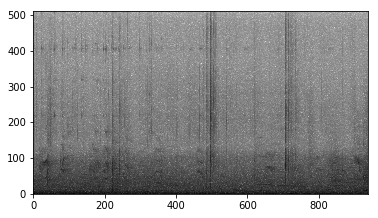

In [28]:
# Passing the PSD through the set of Mel Filters
imagetype = 7
imagesample = 7
nfilters, nfreq = melfb.shape
nrow, ncol = psd[imagetype,imagesample].shape
currentpsd = psd[imagetype,imagesample]

print(nrow, ncol)

melpsd = np.zeros([nrow, ncol]) 

for i in range(40):
  melfilter = melfb[i]
  melpsd = melfilter.reshape((-1,1))*currentpsd + melpsd
 

#melpsd = melfb[0]*np.transpose(currentpsd)

plt.imshow(10*np.log10(melpsd),cmap='gray_r', origin='lower')

In [60]:
mel40 = melfb.dot(currentpsd)
mel40.shape

#plt.imshow(mel40,cmap='gray_r', origin='lower')


(40, 938)

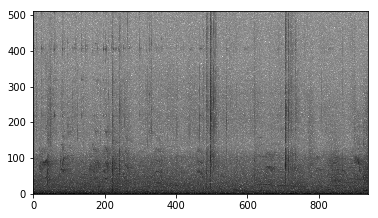

In [58]:
plt.imshow(10*np.log10(abs(melpsd-currentpsd)),cmap='gray_r', origin='lower')